In [7]:
"""
Hypothesis Testing 1: Analyzing Home vs. Away Difference

1. Objective
Before building team profile clusters, we must first statistically determine whether the venue (Home vs. Away) creates a fundamental shift in a team's performance metrics.
We are NOT assuming a "Home Advantage"; instead, we are conducting a two-sided test to investigate if there is any significant difference in playing style and output based on location.

2. Hypothesis Formulation
We test the mean difference ($\mu_{diff}$) between a team's Home stats and Away stats for 5 key metrics:
Possession %
Expected Goals (xG)
Expected Goals Against (xGA)
Corner Kicks
Pressing Intensity (Tackles in Attacking 3rd)

Null Hypothesis (H_0): There is no significant difference between a team's home and away performance.
Alternative Hypothesis (H_1): There is a statistically significant difference in performance based on venue.
Significance Level (alpha): 0.05

3. Methodology
Data Source:** `data/fbref_data.csv`
Statistical Test:** **Paired T-Test** (`scipy.stats.ttest_rel`).
Reasoning:** Since we are comparing the *same* team under two different conditions (Home vs. Away), a paired test eliminates the variability caused by team quality differences.
"""

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2655777169.py:9: SyntaxWarning: invalid escape sequence '\m'
  We test the mean difference ($\mu_{diff}$) between a team's Home stats and Away stats for 5 key metrics:


'\nHypothesis Testing 1: Analyzing Home vs. Away Difference\n\n1. Objective\nBefore building team profile clusters, we must first statistically determine whether the venue (Home vs. Away) creates a fundamental shift in a team\'s performance metrics. \nWe are NOT assuming a "Home Advantage"; instead, we are conducting a two-sided test to investigate if there is any significant difference in playing style and output based on location.\n\n2. Hypothesis Formulation\nWe test the mean difference ($\\mu_{diff}$) between a team\'s Home stats and Away stats for 5 key metrics:\nPossession %\nExpected Goals (xG)\nExpected Goals Against (xGA)\nCorner Kicks\nPressing Intensity (Tackles in Attacking 3rd)\n\nNull Hypothesis (H_0): There is no significant difference between a team\'s home and away performance.\nAlternative Hypothesis (H_1): There is a statistically significant difference in performance based on venue.\nSignificance Level (alpha): 0.05\n\n3. Methodology\nData Source:** `data/fbref_data

Number of teams analyzed: 26

 PAIRED T-TEST RESULTS (Home vs. Away Analysis)

Metric                    | Diff (Home-Away)   | P-Value    | Result
--------------------------------------------------------------------------------
Possession                | +2.07             | 0.00000    | SIGNIFICANT
Expected Goals (xG)       | +0.25             | 0.00000    | SIGNIFICANT
Exp. Goals Against        | -0.26             | 0.00000    | SIGNIFICANT
Corner Kicks              | +1.07             | 0.00000    | SIGNIFICANT
Attacking 3rd Press       | +0.27             | 0.00114    | SIGNIFICANT
--------------------------------------------------------------------------------
If P-Value < 0.05, it indicates a statistically significant Home/Away difference.


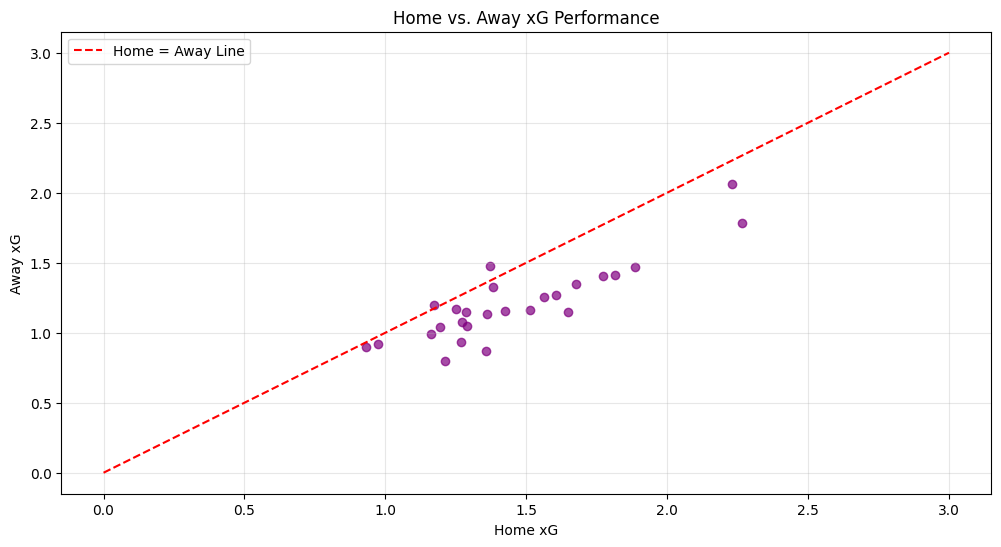

In [8]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fbref_data.csv")

cols_to_use = ['Poss', 'xG', 'xGA', 'Pass_Pass Types_CK', 'Def_Tackles_Att 3rd']
# Column check: Only keep existing columns
existing_cols = [c for c in cols_to_use if c in df.columns]

# Calculate separate means for Home and Away performances for each team
team_means = df.groupby(['team', 'venue'])[['Poss', 'xG', 'xGA', 'Pass_Pass Types_CK', 'Def_Tackles_Att 3rd']].mean().unstack()

# Drop teams with missing data
team_means = team_means.dropna()

print(f"Number of teams analyzed: {len(team_means)}")

# 5 METRICS TO TEST
metrics = [
    ('Poss', 'Possession'),
    ('xG', 'Expected Goals (xG)'),
    ('xGA', 'Exp. Goals Against'),
    ('Pass_Pass Types_CK', 'Corner Kicks'),
    ('Def_Tackles_Att 3rd', 'Attacking 3rd Press')
]

print("\n PAIRED T-TEST RESULTS (Home vs. Away Analysis)\n")
print(f"{'Metric':<25} | {'Diff (Home-Away)':<18} | {'P-Value':<10} | {'Result'}")
print("-" * 80)

# Paired T-Test
for col, name in metrics:
    if col in team_means.columns.get_level_values(0):
        # Extract Home and Away values
        home_vals = team_means[col]['Home']
        away_vals = team_means[col]['Away']

        # Paired T-Test (ttest_rel = related samples)
        t_stat, p_val = stats.ttest_rel(home_vals, away_vals)

        # Calculate Difference (Positive means Home is higher)
        diff = home_vals.mean() - away_vals.mean()

        # Interpret Result
        if p_val < 0.05:
            res_text = "SIGNIFICANT"
        else:
            res_text = "NOT SIGNIFICANT"

        print(f"{name:<25} | {diff:+.2f}             | {p_val:.5f}    | {res_text}")

print("-" * 80)
print("If P-Value < 0.05, it indicates a statistically significant Home/Away difference.")

# Scatter Plot - Visualizing the Variance
plt.figure(figsize=(12, 6))

# Check xG Difference
x_data = team_means['xG']['Home']
y_data = team_means['xG']['Away']

plt.scatter(x_data, y_data, color='purple', alpha=0.7)
# Equality Line (x=y)
plt.plot([0, 3], [0, 3], color='red', linestyle='--', label='Home = Away Line')

plt.title("Home vs. Away xG Performance")
plt.xlabel("Home xG")
plt.ylabel("Away xG")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()